In [204]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import sys 
sys.path.append("../../Code")
import files
import settings as s
import languages as langs
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 500

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
reviews = pd.read_csv('lang_detected_reviews.csv', index_col=0)

In [206]:
disagreements = reviews[reviews['google_langs'] != reviews['langdetect_langs']]

In [207]:
print("Number of times langdetect and google-trans do not agree: %d (%.2f%%)" % (len(disagreements), len(disagreements)*100/len(reviews)))

Number of times langdetect and google-trans do not agree: 6003 (2.03%)


### Distribution of Langs according to Google - in disagreements

In [208]:
disagreements['google_langs'].value_counts()

en         2224
zh-CN      1441
unk        1310
es          249
htzh-CN     219
fr          130
pt           70
de           59
it           35
ko           32
ja           27
espt         26
iw           19
esen         17
enes         14
nl           13
enfr         12
fren         10
bg            9
ru            7
no            6
da            5
ca            5
sv            5
enzh-CN       5
ptes          5
enit          4
cs            4
nlde          3
ro            3
ende          2
is            2
pten          2
fres          2
zh-CNen       2
bs            2
tr            2
aren          1
et            1
itla          1
hi            1
gl            1
caes          1
enla          1
pl            1
skcs          1
eu            1
enno          1
hu            1
iten          1
deen          1
koen          1
enhi          1
daen          1
sk            1
nlen          1
vi            1
fi            1
Name: google_langs, dtype: int64

### Unknowns

#### Unknowns seeme to have a problem with emoticons 

In [120]:
disagreements[disagreements['google_langs'] == 'unk'].head(3)

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated
25,872648,219447358,2017-12-17,156251869,20267158,3370543,Great place. Amazing view. Walkable to time square and transit. Would def stay again. 🤘🏽,N,14,5,unk,0.0,en,0.999995,0,NaN
162,873165,196548541,2017-09-23,74482733,20284322,144669852,"Cozy, beautiful pink room for the princess 👸🏻 You will have separate bathroom (big plus) and live in couple streets from Central Park. So much friendly owners! Hope I'll be back!)",N,30,3,unk,0.0,en,0.999996,0,NaN
236,873420,233414305,2018-02-09,165452026,20286105,144687241,"Einfach perfekt 👌 Wir waren zu viert und hatten genügend Platz in der Wohnung. Die Lage ist perfekt, ein 20-Min-Walk und man ist direkt beim Empire State Building. Die Wohnung war sauber und gut eingerichtet. Auch die Subway ist nur wenige Minuten entfernt. Gleich um die Ecke ist ein kuules Cafe zum Frühstücken. Auch das Starbucks ist nicht weit entfernt. Die Kommunikation mit Mike und auch Preto war super. Wir waren zu viert, sind aber nicht alle gleichzeitig in NYC angekommen. Das war aber...",N,106,11,unk,0.0,de,0.999996,NaN,NaN


In [177]:
unknowns_google = disagreements[disagreements['google_langs'] == 'unk'][['id', 'comments', 'langdetect_langs']]

### Remove majority of the emoticons and rerun Google's language detection

In [179]:
unknowns_google['emo_removed_comments'] = unknowns_google.comments.map(lambda x: langs.give_emoji_free_text(x))

In [180]:
unknowns_google.head(5)

,id,comments,langdetect_langs,emo_removed_comments
25,219447358,Great place. Amazing view. Walkable to time square and transit. Would def stay again. 🤘🏽,en,Great place. Amazing view. Walkable to time square and transit. Would def stay again.
162,196548541,"Cozy, beautiful pink room for the princess 👸🏻 You will have separate bathroom (big plus) and live in couple streets from Central Park. So much friendly owners! Hope I'll be back!)",en,"Cozy, beautiful pink room for the princess You will have separate bathroom (big plus) and live in couple streets from Central Park. So much friendly owners! Hope I'll be back!)"
236,233414305,"Einfach perfekt 👌 Wir waren zu viert und hatten genügend Platz in der Wohnung. Die Lage ist perfekt, ein 20-Min-Walk und man ist direkt beim Empire State Building. Die Wohnung war sauber und gut eingerichtet. Auch die Subway ist nur wenige Minuten entfernt. Gleich um die Ecke ist ein kuules Cafe zum Frühstücken. Auch das Starbucks ist nicht weit entfernt. Die Kommunikation mit Mike und auch Preto war super. Wir waren zu viert, sind aber nicht alle gleichzeitig in NYC angekommen. Das war aber...",de,"Einfach perfekt Wir waren zu viert und hatten genügend Platz in der Wohnung. Die Lage ist perfekt, ein 20-Min-Walk und man ist direkt beim Empire State Building. Die Wohnung war sauber und gut eingerichtet. Auch die Subway ist nur wenige Minuten entfernt. Gleich um die Ecke ist ein kuules Cafe zum Frühstücken. Auch das Starbucks ist nicht weit entfernt. Die Kommunikation mit Mike und auch Preto war super. Wir waren zu viert, sind aber nicht alle gleichzeitig in NYC angekommen. Das war aber a..."
354,219905557,Vtl Zahnpasta mitnehmen 😋,de,Vtl Zahnpasta mitnehmen
426,186805003,"Watson was a gracious host. Excellent communication, friendly and helpful. The room had plenty of space and was comfortable. The apartment had a washer and dryer which is worth its weight in gold especially in NYC. Great location. 👍🏼",en,"Watson was a gracious host. Excellent communication, friendly and helpful. The room had plenty of space and was comfortable. The apartment had a washer and dryer which is worth its weight in gold especially in NYC. Great location."


In [182]:
unknowns_google = langs.split_get_google_languages(unknowns_google, 'emo_removed_comments', 10)

In [184]:
len(unknowns_google[unknowns_google['google_langs'] != unknowns_google['langdetect_langs']])

37

In [186]:
unknowns_google

,id,comments,langdetect_langs,emo_removed_comments,google_langs,google_langs_conf
25,219447358,Great place. Amazing view. Walkable to time square and transit. Would def stay again. 🤘🏽,en,Great place. Amazing view. Walkable to time square and transit. Would def stay again.,en,1.000000
162,196548541,"Cozy, beautiful pink room for the princess 👸🏻 You will have separate bathroom (big plus) and live in couple streets from Central Park. So much friendly owners! Hope I'll be back!)",en,"Cozy, beautiful pink room for the princess You will have separate bathroom (big plus) and live in couple streets from Central Park. So much friendly owners! Hope I'll be back!)",en,1.000000
236,233414305,"Einfach perfekt 👌 Wir waren zu viert und hatten genügend Platz in der Wohnung. Die Lage ist perfekt, ein 20-Min-Walk und man ist direkt beim Empire State Building. Die Wohnung war sauber und gut eingerichtet. Auch die Subway ist nur wenige Minuten entfernt. Gleich um die Ecke ist ein kuules Cafe zum Frühstücken. Auch das Starbucks ist nicht weit entfernt. Die Kommunikation mit Mike und auch Preto war super. Wir waren zu viert, sind aber nicht alle gleichzeitig in NYC angekommen. Das war aber...",de,"Einfach perfekt Wir waren zu viert und hatten genügend Platz in der Wohnung. Die Lage ist perfekt, ein 20-Min-Walk und man ist direkt beim Empire State Building. Die Wohnung war sauber und gut eingerichtet. Auch die Subway ist nur wenige Minuten entfernt. Gleich um die Ecke ist ein kuules Cafe zum Frühstücken. Auch das Starbucks ist nicht weit entfernt. Die Kommunikation mit Mike und auch Preto war super. Wir waren zu viert, sind aber nicht alle gleichzeitig in NYC angekommen. Das war aber a...",de,1.000000
354,219905557,Vtl Zahnpasta mitnehmen 😋,de,Vtl Zahnpasta mitnehmen,de,1.000000
426,186805003,"Watson was a gracious host. Excellent communication, friendly and helpful. The room had plenty of space and was comfortable. The apartment had a washer and dryer which is worth its weight in gold especially in NYC. Great location. 👍🏼",en,"Watson was a gracious host. Excellent communication, friendly and helpful. The room had plenty of space and was comfortable. The apartment had a washer and dryer which is worth its weight in gold especially in NYC. Great location.",en,1.000000
575,224601824,"Yuval, was very kind and caring. Quick response and an amazing apartment. Clean, comfortable and with a perfect location. A small kitchen and a rather noisy heater did not diminish the well-being. Would definitely recommend it! Thanks for hosting us, Yuval 😊",en,"Yuval, was very kind and caring. Quick response and an amazing apartment. Clean, comfortable and with a perfect location. A small kitchen and a rather noisy heater did not diminish the well-being. Would definitely recommend it! Thanks for hosting us, Yuval",en,1.000000
812,241843446,Diane's home was lovely. No complaints. The climb is a nice workout. 😊,en,Diane's home was lovely. No complaints. The climb is a nice workout.,en,1.000000
849,204348461,Shivi was such a fabulous host! Her place was clean and conveniently located. Would highly recommend her place 😊,en,Shivi was such a fabulous host! Her place was clean and conveniently located. Would highly recommend her place,en,1.000000
966,202264719,"As advertised, a very authentic NYC midtown apartment that was very close to the theatre district. Randi was excellent with communication. I was traveling alone with my 17yr old daughter so safety was a big concern. Randi's apartment is on a safe street, and has a lock on main front door of building, another into her apt, and yet another into our private room. We felt very safe. The bed was comfortable and there were two very soft robes for use. We would definitely recommend and will retu...",en,"As advertised, a very authentic NYC midtown apartment that was very close to the theatre district. Randi was excellent with communication. I was traveling alone with my 17yr old daughter so safety was a big concern. Randi's apa

### Save - disagreements_g_unk

In [187]:
unknowns_google.to_csv("google_unks_redone.csv")

### When GT is = 'unk' what is distribution of LD detection

In [188]:
reviews[reviews['google_langs'] == 'unk']['langdetect_langs'].value_counts()

en       1033
fr         99
es         73
unk        52
de         33
zh-cn      16
pt         12
it         10
da          8
ko          5
ru          4
nl          4
sv          3
tl          2
cs          2
ja          1
ca          1
sw          1
no          1
af          1
id          1
Name: langdetect_langs, dtype: int64

## Google- Trans - English Reviews

In [189]:
g_en_disagree = disagreements[disagreements['google_langs'] == 'en'][['id', 'comments', 'langdetect_langs', 'token_len', 'num_of_sents']]

### Length distribution

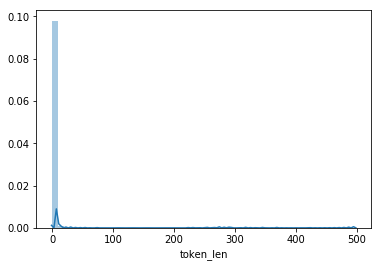

In [190]:
sns.distplot(g_en_disagree['token_len'])
plt.show()

In [191]:
g_en_disagree['token_len'].value_counts()

2      666
1      515
0      313
3      217
4      217
5       94
6       81
7       38
8       19
10      10
9        8
11       6
12       3
275      2
13       2
284      1
288      1
290      1
264      1
274      1
268      1
308      1
256      1
74       1
56       1
30       1
14       1
292      1
369      1
348      1
271      1
335      1
327      1
319      1
317      1
295      1
293      1
283      1
255      1
422      1
251      1
241      1
233      1
229      1
223      1
345      1
490      1
498      1
Name: token_len, dtype: int64

### When GT is = 'en' what is distribution of langdetect detection

In [192]:
g_en_disagree['langdetect_langs'].value_counts()

ro       391
unk      330
fr       264
so       202
af       188
ca       137
tl        73
de        68
nl        66
cs        56
it        54
cy        44
es        43
no        37
id        35
pl        34
sw        30
hr        23
et        19
hu        19
da        18
vi        18
pt        16
fi        12
sv        11
sl        10
tr         9
sk         8
ru         4
sq         3
zh-cn      1
ja         1
Name: langdetect_langs, dtype: int64

## Langdetect - EN 

### Look at value distribution

In [193]:
disagreements['langdetect_langs'].value_counts()

en       1699
zh-cn    1100
unk       550
ro        425
fr        384
so        209
af        196
ca        161
es        131
ko        129
de        110
zh-tw      94
pt         85
tl         79
nl         77
it         76
cs         58
no         51
cy         48
id         39
pl         38
sw         32
da         30
vi         29
hr         26
hu         23
et         21
he         19
sv         17
fi         14
sl         13
sk         11
tr          9
ru          8
sq          3
bg          3
lv          2
ja          2
lt          2
Name: langdetect_langs, dtype: int64

### When LD is = 'en' what is distribution of googles detection

In [194]:
disagreements[disagreements['langdetect_langs'] == 'en']['google_langs'].value_counts()

unk        1033
es          164
zh-CN       132
fr          103
pt           61
de           41
ko           32
it           28
ja           27
enes         14
esen         13
enfr          9
fren          6
enzh-CN       5
nl            4
ru            3
enit          3
no            2
ende          2
zh-CNen       2
pten          2
sv            2
ca            2
deen          1
sk            1
gl            1
fres          1
hu            1
koen          1
enhi          1
daen          1
nlen          1
Name: google_langs, dtype: int64

## Langdetect = 'unk'

In [202]:
disagreements[(disagreements['langdetect_langs'] == 'unk') & (~disagreements['comments'].isnull())]['google_langs'].value_counts()

en       263
zh-CN      1
Name: google_langs, dtype: int64

In [203]:
disagreements[(disagreements['langdetect_langs'] == 'unk') & (~disagreements['comments'].isnull())]

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated
183,873194,236853031,2018-02-20,140293241,20285167,118267672,.,N,0,1,en,0.0,unk,0.0,NaN,NaN
300,859427,219905396,2017-12-19,147259157,19800814,48916298,❤,N,0,1,en,0.0,unk,0.0,NaN,NaN
1169,687434,190029233,2017-09-03,121479888,14299104,29216042,.,N,0,1,en,0.0,unk,0.0,NaN,NaN
3711,460548,136562233,2017-03-11,117487373,7618475,39719913,.,N,0,1,en,0.0,unk,0.0,NaN,NaN
5625,290342,110020359,2016-10-23,29151180,3554598,17898015,.,N,0,1,en,0.0,unk,0.0,NaN,NaN
10601,123259,87694357,2016-07-21,9414337,751818,3937164,.,N,0,1,en,0.0,unk,0.0,NaN,NaN
12059,642757,166517753,2017-07-03,117319757,13191819,5325493,.,N,0,1,en,0.0,unk,0.0,NaN,NaN
12076,642774,197959853,2017-09-27,129183027,13191819,5325493,:),N,0,1,en,0.0,unk,0.0,NaN,NaN
12985,307259,178032490,2017-08-04,103582216,3870797,4713818,...,N,0,1,en,0.0,unk,0.0,NaN,NaN
14408,290245,123085603,2016-12-27,9923746,3553768,17891677,-,N,0,1,en,0.0,unk,0.0,NaN,NaN


## Lang Mixtures

In [216]:
lang_mix_ids = [r['id'] for i, r in disagreements.iterrows() if len(r['google_langs']) > 2 and 'en' in r['google_langs']]

In [220]:
reviews[reviews['id'].isin(lang_mix_ids)]

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated
10450,122823,217319811,2017-12-08,15730669,747605,3665794,"In English : We loved our stay at Jack's appartment. It is well located, just 5 minutes walk to the subway. Lots of stores and restaurants next to it. Jack is very very quick to answer and we had no problem to communicate with him, even during our stay when we had questions. He was very kind with us. The appartment itself is almost the same as on the pictures. It is clean. The bed is very comfortable ! The only thing I have to say is the appartment is a little noisy, especially at night, ...",N,237,20,fren,0.535141,fr,0.999998,NaN,NaN
15607,85511,61074193,2016-01-31,49925654,476919,2135229,I had a very satified stay here for a week! Lucia and Ming were so nice and helpful all the time. I would like to introduce my friend to stay over there next time if they come to New York.房东讲中文，给我提供了许多的帮助，推荐大家住在这里。,N,43,3,enzh-CN,0.552807,en,0.999998,0,NaN
19392,874301,182011701,2017-08-13,98015349,20322645,144992525,"Edith and Vannesa very attentive of our arrival to the city. The location is perfect ... two blocks from Times Square, a block from Rockefeller Center, Sant Patricks church and with easy access by metro or bus as it is located in the whole heart of Manhattan. The apt corresponds as to the description and the photos 100% Recommended for pleasure or business trip ... Excellent! Edith y Vannesa muy atentas de nuestra llegada a la ciudad. La ubicación es perfecta... a dos bloques de times squar...",N,132,7,esen,0.520609,en,0.571427,"['ca', 'es', 'es', 'es']","Edith and Vannesa very attentive of our arrival to the city.The location is perfect ... two blocks from Times Square, a block from Rockefeller Center, Sant Patricks church and with easy access by metro or bus as it is located in the whole heart of Manhattan.The apt corresponds as to the description and the photos 100% Recommended for pleasure or business trip ...Excellent!Edith and Vannesa are very attentive to our arrival in the city.The location is perfect ... two blocks from Times Square,..."
19513,858603,214055249,2017-11-24,158494659,19762901,62521666,Gooood,N,1,1,enno,0.591032,so,0.999997,NaN,NaN
20922,688710,117021184,2016-12-04,49793893,14334031,7721149,"Everything was really nice. The House is very clean and tidy. Ricardo is very polite, nice and lovely. We were just for the weekend, but we really love the place. We'll recommend it. Todo perfecto en casa de Ricardo, la casa muy limpia y ordenada. Ricardo es muy simpático, educado y agradable. 100% recomendable. Buena ubicación.",N,56,9,enes,0.532446,en,0.857140,"['es', 'es', 'es']","Everything was really nice.The House is very clean and tidy.Ricardo is very polite, nice and lovely.We were just for the weekend, but we really love the place.We'll recommend it.Everything perfect in Ricardo's house, the house very clean and tidy.Ricardo is very nice, polite and nice.100% recomendable.Good ubication."
23600,82674,11997755,2014-04-21,6781865,453255,2252261,"Stephanie's apartment is just what you might need for a great vacation in New York! Staying in that vibrant neighborhood was exciting, made us feel as being part of the city. On the other hand, you are just around the corner from all great New York attractions. We stayed for a week. It is just as it looks in the photographs: sunny, clean, bright, spacious, lovely. I will certainly go back! Stephanie was a perfect host. Always aware of any possible need and anticipating them! Communication ...",N,185,20,enes,0.513969,en,0.999996,"['es', 'es', 'es', 'es', 'es', 'es']","Stephanie's apartment is just what you might need for a great vacation in New York!Staying in that vibrant neighborhood was exciting, made us feel as being part of the city.On the other hand, you are just around the corner from all great New York attractions.We

# Outcomes

We will restrict reviews to only:
    - When they are both in agreement
    - When Google == Unk and langdetect = en with conf > 0.99
    - when num of tokens is less than 5 and google = en with high conf
    - when langdetect - conf > 0.9 and google includes 'en'
    
Work to do 
- remove null from comments
- add all of these restrictions